In [29]:
import pandas as pd 
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [13]:
df = pd.read_csv('3_29_to_4_1.csv')
df = df.drop(columns=['Unnamed: 0'])

In [14]:
df.head(2)

,date,callExp,ticker,underlying,strike,bid,ask,days_maturity,interest,vol,pct_away
0,2022-03-29 06:29:00,4/14/22,SPY,459.805,436,21.55,22.22,16,0.01,0.203151,-5.177195
1,2022-03-29 06:29:00,4/14/22,SPY,459.805,437,20.66,21.32,16,0.01,0.196946,-4.959711


In [18]:
test = df.loc[df['date'] == '2022-03-29 06:30:00']

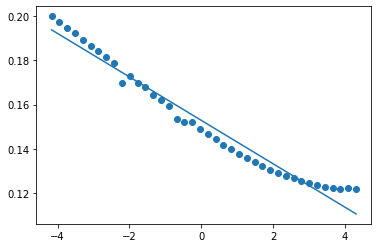

In [22]:
plt.scatter(test['pct_away'], test['vol'])

In [26]:
a, b = np.polyfit(test['pct_away'], test['vol'], 1)

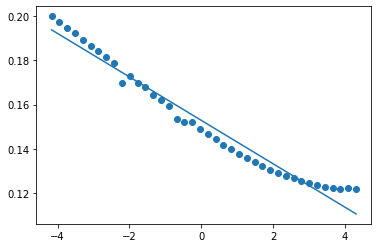

In [27]:
plt.scatter(test['pct_away'], test['vol'])
plt.plot(test['pct_away'], a*test['pct_away']+b) 

In [30]:
def func(x, a, b):
    return a*np.exp(x*b)

In [31]:
popt, pcuv = curve_fit(func, test['pct_away'], test['vol'])
print(popt)

[ 0.15079422 -0.06584162]


In [35]:
xFit = np.arange(-5,5,0.1)

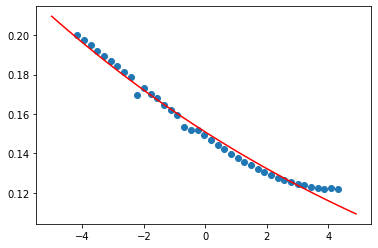

In [36]:
plt.scatter(test['pct_away'], test['vol'])
plt.plot(xFit, func(xFit, *popt), 'r')